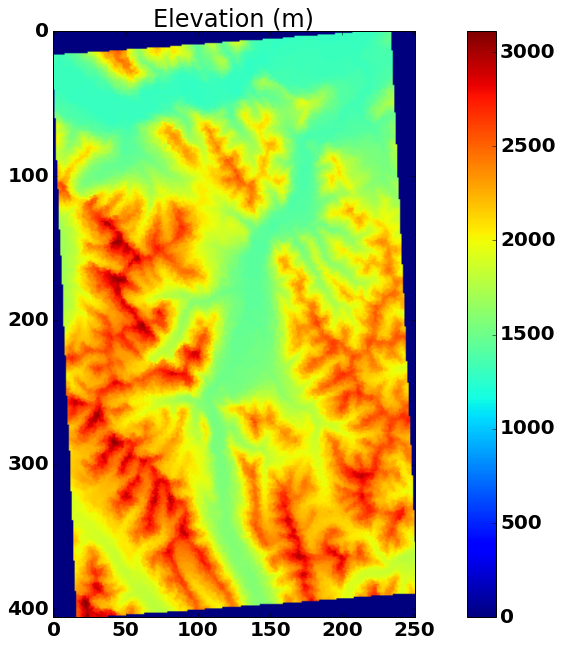

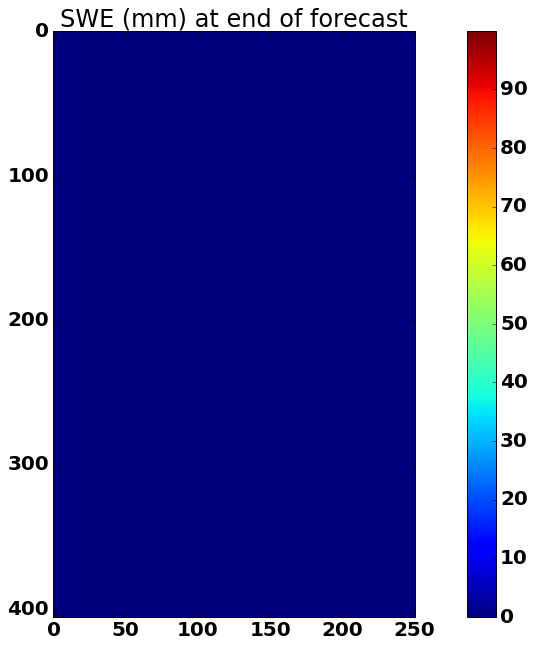

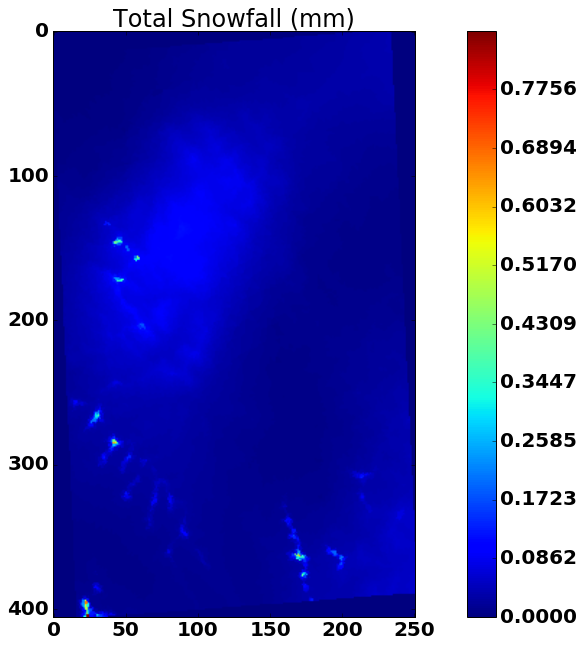

In [22]:
%matplotlib inline
from PIL import Image
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
plt.rcParams.update({'figure.max_open_warning': 0})

def main():   
    # Set font size
    font = {'weight' : 'bold',
            'size'   : 20}
    matplotlib.rc('font', **font)

    # Input Tif dir
    #tif_dir   = os.path.normpath(r'/home/nwayand/snow_models/output_CHM/SnowCast/output')
    tif_dir   = os.path.normpath(r'C:\Users\new356\Model_Output\CHM\SnowCast')
    
    # Move to Tif dir
    os.chdir(tif_dir) 
    
    # Elevation
    content = glob.glob('*Elevation*') # Get list of files
    Elev = open_tif(content[0])
    plt.figure()
    plt.imshow(Elev)
    plt.clim(0,Elev.max().max())
    plt.colorbar(ticks=[np.arange(0, Elev.max().max(),500)])
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5,forward=True)
    plt.title('Elevation (m)')

#     # Air Temperature
#     content = glob.glob('*_t.tif')
#     files_sorted = sort_by_Run_hour(content)
#     for cfile in files_sorted:
#         t = open_tif(cfile)
#         plot_air_temp(t,cfile)
    
    # SWE at end of run
    content = glob.glob('*_swe.tif') # Get list of files
    files_sorted = sort_by_Run_hour(content)
    swe = open_tif(files_sorted[len(files_sorted)-1])
    plot_swe(swe,'SWE (mm) at end of forecast')
        
#     # SWE 
#     content = glob.glob('*_swe.tif') # Get list of files
#     files_sorted = sort_by_Run_hour(content)
#     for cfile in files_sorted:
#         swe = open_tif(cfile)
#         plot_swe(swe,cfile)
        
        
    # Snowfall 
    content = glob.glob('*_p_snow.tif') # Get list of files
    files_sorted = sort_by_Run_hour(content)
    for cfile in files_sorted:
        if not 'p_snow' in locals():
            p_snow = open_tif(cfile)
        else:
            p_snow = p_snow + open_tif(cfile)
    # Plot
    plot_p_snow(p_snow,'Total Snowfall (mm)')

def plot_air_temp(df,cfile):
    # Plot air temperature
    plt.figure()
    plt.imshow(df)
    plt.clim(-10,25)
    plt.colorbar(ticks=[np.arange(-10, 25,5)])
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5,forward=True)
    plt.title(cfile)
        
def plot_swe(df,cfile):
    # Plot swe
#     if df.max().max()>0:
        plt.figure()
        plt.imshow(df)
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5,forward=True)
        plt.title(cfile)
#         plt.clim(0,df.max().max())
#         plt.colorbar(ticks=[np.arange(0, df.max().max() , (df.max().max()-0)/10)])
        plt.clim(0,100)
        plt.colorbar(ticks=[np.arange(0, 100 , (100-0)/10)])
    
# plot amout of precip as snow (mm)
def plot_p_snow(df,cfile):
    # Plot p_snow
    plt.figure()
    plt.imshow(df)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5,forward=True)
    plt.title(cfile)
    plt.clim(0,df.max().max())
    plt.colorbar(ticks=[np.arange(0, df.max().max() , (df.max().max()-0)/10)])


    
def open_tif(cfile):
    im = Image.open(cfile)
    var = np.array(im)
    df = pd.DataFrame(var)
    return df

# Sorts files by run hour (hack until we have forecast time in output files!!!!)
def sort_by_Run_hour(content):
    RunHour = []
    for cf in content:
        temp1 = str.split(cf,'_')
        temp2 = str.split(temp1[0],'SC')
        RunHour.append(int(temp2[1]))
    files1 = zip(content,RunHour)
    files_sorted = sorted(files1, key=lambda cf: cf[1])
    files_sorted = [i[0] for i in files_sorted]
    return files_sorted

# Call main()
main()